<a href="https://colab.research.google.com/github/Ryzhikov114/test/blob/main/for_Alena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Алёна привет!👋 Это Кирилл, я бы хотел предложить тебе свои услуги в анализе данных для бизнеса.

Немного о себе. Я учусь в яндекс.практикуме на аналитика данных (прошел 1/3 курса). Нас учат работать с Python(pandas, numpy, matplotlib, seaborn), на данный момент это один из самых востребованных языков програмированния, в этой работе я попытаюсь показать часть возможностей. Наверное, это может быть тебе полезно, в презентациях, как часть отчета. Или как отдельный кейс.

> ❓ Что делает аналитик данных? Я получаю какие то данные, обычно это таблицы. Например клиенты парихмахерской или интернет магазина. Далее я анализирую и отвечаю на вопросы(которые задает бизнес), даю рекомендации. Например на каких услугах/товарах мы больше всего зарабатываем, на каких меньше. Что можно улучшить, чтобы заработать больше и на чем сконцентрироваться, а на что не стоит тратить время и тд.

В этой демонстрации я бы хотел поговорить и показать именно RFM анализ. 🙂

# Про RFM анализ кратко

Анализ RFM — это маркетинговая модель для сегментации клиентов на основе поведения. Он группирует клиентов на основе их истории транзакций — как недавно, как часто и сколько они покупали.

RFM помогает разделить клиентов на различные категории или кластеры, чтобы определить клиентов, которые с большей вероятностью откликнутся на рекламные акции, а также на будущие услуги персонализации.

RFM анализ помогает ответить на вопросы:

- Кто мои лучшие клиенты?
- Какие клиенты находятся на грани оттока?
- У кого есть потенциал превратиться в более прибыльных клиентов?
- Кто такие потерянные клиенты, на которых не нужно обращать особого внимания?
- Каких клиентов вы должны сохранить?
- Кто ваши постоянные клиенты?
- Какая группа клиентов, скорее всего, отреагирует на вашу текущую рекламную кампанию?

> Подробно про RFM анализ вот тут: https://www.putler.com/rfm-analysis/ 

Такой метод анализа подойдет далеко не каждому бизнесу. Если у бизнеса мало клиентов, то никакого смысла в этом нет. Они и так знают своих клиентов в лицо. Еще необходимо чтобы бизнес собирал данные и чем больше эти данные тем точнее и эффективнее можно будет построить прогнозы и дать рекомендации. 

> ❓ Какие данные мне нужны от бизнеса:

1. Идентификатор клиента/электронная почта/имя и т. д .: для их идентификации
2. Дата покупок, для понимания когда последний раз он что то покупал. 
3. Факт покупки, чтобы посчитать количество покупок на кажого клиента
4. Сумма одной покупки, чтобы посчитать общую сумму покупок на каждого клиента

https://www.kaggle.com/datasets/carrie1/ecommerce-data

https://drive.google.com/file/d/1_c2gPEKkTlDgJsEH507bO1VgtiqaTUVu/view?usp=sharing

In [ ]:
! gdown 1_c2gPEKkTlDgJsEH507bO1VgtiqaTUVu

Downloading...
From: https://drive.google.com/uc?id=1_c2gPEKkTlDgJsEH507bO1VgtiqaTUVu
To: /content/E-Commerce-Data.zip
100% 7.55M/7.55M [00:00<00:00, 94.2MB/s]


In [ ]:
! unzip /content/E-Commerce-Data.zip -d /content/

Archive:  /content/E-Commerce-Data.zip
  inflating: /content/data.csv       


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import random
import squarify

plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/data.csv', encoding = 'unicode_escape')

# Знакомимся с данными

>У нас есть таблица реального онлайн магазина, где 540 000 строк и 8 колонок, это клиенты которые купили какой то товар за 2010 и 2011 года. В таблице есть столбцы с описанием, что это за товар, количество заказанного товара, когда был куплен, стоимость 1 еденицы и тд...

Прежде чем делать RFM мне нужно подготовить данные, этот процесс представлен в виде кода. Если нужно я могу подробно рассказать что я делал, но сейчас это избыточно. Давай передем сразу к сути. Предлагаю нажать в левом меню на "Визуализация и первые результаты"


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isna().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# удаление пропусков
df = df.dropna().reset_index(drop=True)

In [ ]:
# замена формата даты
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')

In [ ]:
# столбец с месяцем
df['month'] = df['InvoiceDate'].astype('datetime64[M]')

In [ ]:
# удаление нулей
df = df[df['UnitPrice'] != 0].reset_index(drop=True)

In [ ]:
# удаление нулей
df = df[df['Quantity'] > 0].reset_index(drop=True)

In [ ]:
# создание стобца с выручкой
df['revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# группировка по уникальному пользователю
date_today = df.groupby('CustomerID')['month'].last().reset_index()

In [ ]:
# колличество дней прошедших с прошлой покупки
date_today['recency'] = (pd.to_datetime('2011-12-31') - date_today['month']).dt.days

In [ ]:
# тоблица скоринка RFM
rfm = df.groupby('CustomerID')['revenue'].agg(['count', 'sum']).reset_index()

In [ ]:
rfm

,CustomerID,count,sum
0,12346.0,1,77183.60
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4333,18280.0,10,180.60
4334,18281.0,7,80.82
4335,18282.0,12,178.05
4336,18283.0,756,2094.88


In [ ]:
rfm.columns = ['CustomerID', 'frequency', 'monetary']

In [ ]:
rfm = rfm.merge(date_today, how='left', on='CustomerID')

In [ ]:
rfm

,CustomerID,frequency,monetary,month,recency
0,12346.0,1,77183.60,2011-01-01,364
1,12347.0,182,4310.00,2011-12-01,30
2,12348.0,31,1797.24,2011-09-01,121
3,12349.0,73,1757.55,2011-11-01,60
4,12350.0,17,334.40,2011-02-01,333
...,...,...,...,...,...
4333,18280.0,10,180.60,2011-03-01,305
4334,18281.0,7,80.82,2011-06-01,213
4335,18282.0,12,178.05,2011-12-01,30
4336,18283.0,756,2094.88,2011-12-01,30


In [ ]:
rfm['recency_score'] = pd.cut(rfm['recency'],6,labels=[5,4,3,2,1,0]).astype(int)

In [ ]:
rfm['frequency_score'] = pd.qcut(rfm['frequency'],6,labels=[0,1,2,3,4,5]).astype(int)

In [ ]:
rfm['monetary_score'] = pd.qcut(rfm['monetary'],6,labels=[0,1,2,3,4,5]).astype(int)

In [ ]:
#rfm['score'] = rfm['frequency_score'] + rfm['monetary_score']

In [ ]:
#rfm['score'] = rfm['score'].astype(int)

In [ ]:
rfm

,CustomerID,frequency,monetary,month,recency,recency_score,frequency_score,monetary_score
0,12346.0,1,77183.60,2011-01-01,364,0,0,5
1,12347.0,182,4310.00,2011-12-01,30,5,5,5
2,12348.0,31,1797.24,2011-09-01,121,4,2,4
3,12349.0,73,1757.55,2011-11-01,60,5,3,4
4,12350.0,17,334.40,2011-02-01,333,1,1,1
...,...,...,...,...,...,...,...,...
4333,18280.0,10,180.60,2011-03-01,305,1,0,0
4334,18281.0,7,80.82,2011-06-01,213,2,0,0
4335,18282.0,12,178.05,2011-12-01,30,5,1,0
4336,18283.0,756,2094.88,2011-12-01,30,5,5,4


In [ ]:
def catch (df):
  if df['frequency_score'] > df['monetary_score']:
    return df['frequency_score']
  return df['monetary_score']

In [ ]:
rfm['f+m'] = rfm.apply(catch, axis=1)

In [ ]:
# сортирует присвоенные очки rfm и назначает категорию
def sort(df):
  
  r = df['recency_score']
  fm = df['f+m']
  
  if r>=4 and fm>=4:
    return 'Чемпион'
  if r>=2 and fm>=3:
    return 'Лояльный клиент'
  if r>=3 and 1<=fm<=3:
    return 'Потенциально лояльный'
  if 4<=r<=5 and fm<=1:
    return 'Недавний клиент'
  if 3<=r<=4 and fm<=1:
    return 'Перспективный'
  if 2<=r<=3 and 2<=fm<=3:
    return 'Требует внимания'
  if 2<=r<=3 and fm<=2:
    return 'Почти спящий'
  if r<=1 and fm>=4:
    return 'Нельзя потерять'
  if r<=2 and fm>=2:
    return 'Рискованный'
  if 1<=r<=2 and 1<=fm<=2:
    return 'Спящий'   
  if r<=2 and fm<=2:
    return 'Потеряли' 
  return 'no_category'

In [ ]:
rfm['sorted'] = rfm.apply(sort, axis=1)

In [ ]:
print(rfm[rfm['sorted'] == 'Потеряли'][['recency_score', 'frequency_score', 'monetary_score']].min())
print(rfm[rfm['sorted'] == 'Потеряли'][['recency_score', 'frequency_score', 'monetary_score']].max())

recency_score      0
frequency_score    0
monetary_score     0
dtype: int64
recency_score      1
frequency_score    1
monetary_score     1
dtype: int64


In [ ]:
pd.cut(rfm['recency'],6)

0         (334.167, 395.0]
1         (29.635, 90.833]
2        (90.833, 151.667]
3         (29.635, 90.833]
4       (273.333, 334.167]
               ...        
4333    (273.333, 334.167]
4334      (212.5, 273.333]
4335      (29.635, 90.833]
4336      (29.635, 90.833]
4337     (90.833, 151.667]
Name: recency, Length: 4338, dtype: category
Categories (6, interval[float64, right]): [(29.635, 90.833] < (90.833, 151.667] < (151.667, 212.5] <
                                           (212.5, 273.333] < (273.333, 334.167] < (334.167, 395.0]]

In [ ]:
rfm

,CustomerID,frequency,monetary,month,recency,recency_score,frequency_score,monetary_score,f+m,sorted
0,12346.0,1,77183.60,2011-01-01,364,0,0,5,5,Нельзя потерять
1,12347.0,182,4310.00,2011-12-01,30,5,5,5,5,Чемпион
2,12348.0,31,1797.24,2011-09-01,121,4,2,4,4,Чемпион
3,12349.0,73,1757.55,2011-11-01,60,5,3,4,4,Чемпион
4,12350.0,17,334.40,2011-02-01,333,1,1,1,1,Спящий
...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,10,180.60,2011-03-01,305,1,0,0,0,Потеряли
4334,18281.0,7,80.82,2011-06-01,213,2,0,0,0,Почти спящий
4335,18282.0,12,178.05,2011-12-01,30,5,1,0,1,Потенциально лояльный
4336,18283.0,756,2094.88,2011-12-01,30,5,5,4,5,Чемпион


In [ ]:
pd.qcut(rfm['monetary'],5)

0       (2058.426, 280206.02]
1       (2058.426, 280206.02]
2         (942.276, 2058.426]
3         (942.276, 2058.426]
4          (250.194, 490.096]
                ...          
4333         (3.749, 250.194]
4334         (3.749, 250.194]
4335         (3.749, 250.194]
4336    (2058.426, 280206.02]
4337      (942.276, 2058.426]
Name: monetary, Length: 4338, dtype: category
Categories (5, interval[float64, right]): [(3.749, 250.194] < (250.194, 490.096] <
                                           (490.096, 942.276] < (942.276, 2058.426] <
                                           (2058.426, 280206.02]]

In [ ]:
pd.cut(rfm['monetary'],5)

0       (56044.204, 112084.658]
1         (-276.452, 56044.204]
2         (-276.452, 56044.204]
3         (-276.452, 56044.204]
4         (-276.452, 56044.204]
                 ...           
4333      (-276.452, 56044.204]
4334      (-276.452, 56044.204]
4335      (-276.452, 56044.204]
4336      (-276.452, 56044.204]
4337      (-276.452, 56044.204]
Name: monetary, Length: 4338, dtype: category
Categories (5, interval[float64, right]): [(-276.452, 56044.204] < (56044.204, 112084.658] <
                                           (112084.658, 168125.112] < (168125.112, 224165.566] <
                                           (224165.566, 280206.02]]

In [ ]:
rfm[rfm['sorted'] == 'no_category'].sort_values('monetary',ascending=False).head(50)

,CustomerID,frequency,monetary,month,recency,recency_score,frequency_score,monetary_score,f+m,sorted


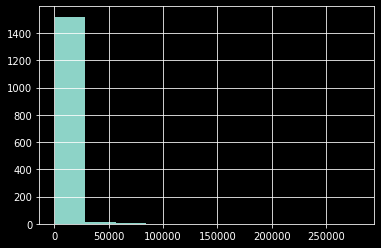

In [ ]:
rfm[rfm['sorted'] == 'Чемпион']['monetary'].hist()

# RMF анализ

Категории, их описание, рекомендации

- **Чемпионы**	Купили недавно, покупайте часто и тратьте больше всех!	Наградите их. Могут быть первопроходцами новых продуктов. Будет продвигать ваш бренд.

- **Лояльные клиенты**	Тратьте хорошие деньги с нами часто. Реагирует на рекламные акции.	Допродажи продуктов с более высокой стоимостью. Спросите отзывы. Задействуйте их.

- **Потенциальный лоялист**	Недавние клиенты, но потратили хорошую сумму и купили не один раз.	Предложите членство/программу лояльности, порекомендуйте другие продукты.

- **Недавние клиенты**	Купил совсем недавно, но не часто.	Обеспечьте поддержку при адаптации, дайте им ранний успех, начните строить отношения.

- **Перспективный**	Недавние покупатели, но не потратили много.	Создайте узнаваемость бренда, предлагайте бесплатные пробные версии

- **Клиенты, требующие внимания**	Выше средней недавности, частоты и денежной стоимости. Хотя может и не так давно купил.	Делайте ограниченные по времени предложения, Рекомендуйте на основе прошлых покупок. Повторно активируйте их.

- **о спать**	Ниже средней давности, частоты и денежной стоимости. Потеряет их, если не активировать повторно.	Делитесь ценными ресурсами, рекомендуйте популярные продукты/продления со скидкой, восстанавливайте связь с ними.

- **Рискованно**	Тратил большие деньги и покупал часто. Но давно. Нужно вернуть их!	Отправляйте персонализированные электронные письма, чтобы восстановить связь, предлагать обновления, предоставлять полезные ресурсы.

- **Не могу потерять их**	Делал самые большие покупки, и часто. Но давно не возвращался.	Верните их с помощью обновлений или новых продуктов, не теряйте их из-за конкуренции, общайтесь с ними.

- **Спящий**	Последняя покупка была давней, мало трат и мало заказов.	Предложите другие соответствующие продукты и специальные скидки. Воссоздайте ценность бренда.

- **Потерял**	Самая низкая новизна, частота и денежные оценки.	Возродите интерес с помощью рекламной кампании, иначе игнорируйте.

>Ты можешь увидеть категории, и количество уникальных клиентов. Всего в RFM анализе 11 категорий.

In [ ]:
dd

In [ ]:
# таблица категорий и количества пользователей
rfm_count = rfm.groupby('sorted')['CustomerID'].agg('count').reset_index()
rfm_count.sort_values('CustomerID',ascending=False)

,sorted,CustomerID
10,Чемпион,1551
0,Лояльный клиент,866
4,Потенциально лояльный,842
5,Потеряли,231
7,Рискованный,215
1,Недавний клиент,175
6,Почти спящий,153
8,Спящий,130
9,Требует внимания,80
2,Нельзя потерять,50


>Древовидная карта, один из способов визуализации клиентов, размер показывает долю от общего числа клиентов. Так же внутри подписана категория и количество клиентов. 

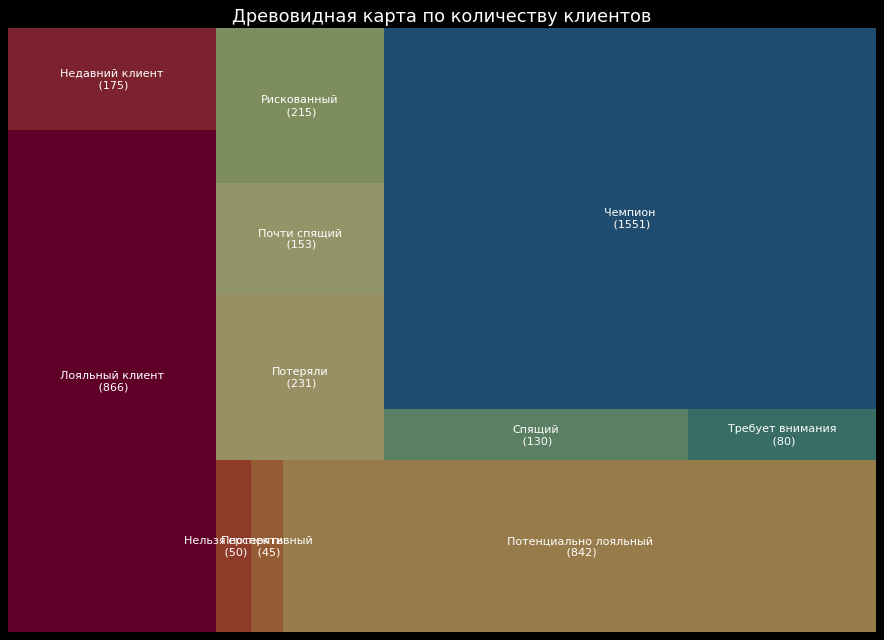

In [ ]:
# Prepare Data
t = rfm.groupby('sorted').size().reset_index(name='counts')
labels = t.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = t['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(14,10), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.6)

# Decorate
plt.title('Древовидная карта по количеству клиентов', fontsize=16)
plt.axis('off')
plt.show()

>Еще один способ визуализации, столбчатая диаграмма.

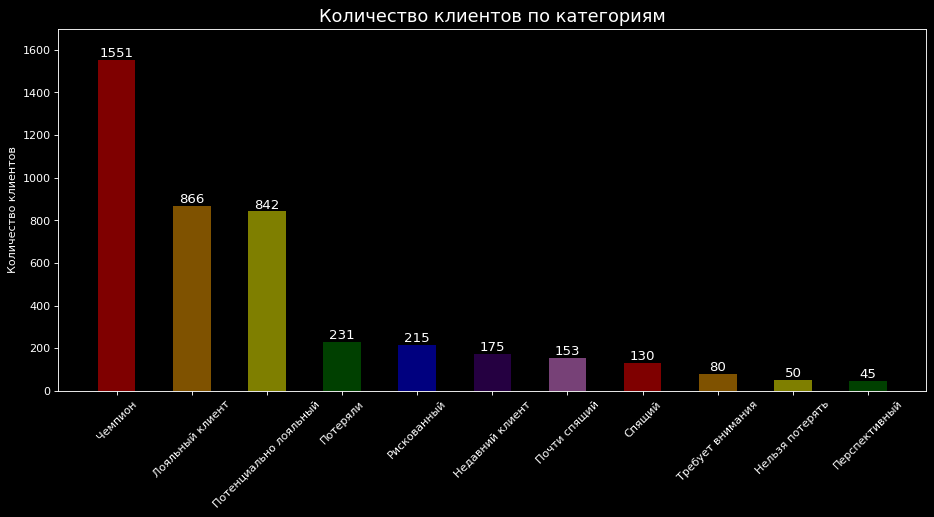

In [ ]:
# Prepare Data
t = rfm.groupby('sorted').size().reset_index(name='counts').sort_values('counts',ascending=False)
n = t['sorted'].unique().__len__()+1

# Plot Bars
plt.figure(figsize=(14,6), dpi= 80)
plt.bar(t['sorted'], t['counts'], color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'], width=.5, alpha=0.5)
for i, val in enumerate(t['counts'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(t['sorted'], rotation=45, horizontalalignment= 'center')
plt.title("Количество клиентов по категориям", fontsize=16)
plt.ylabel('Количество клиентов')
plt.ylim(0, 1700)
plt.show()

>Таблица по категориям и прибыли которая эта категрия приносит бизнесу.

In [ ]:
rfm_monetary = rfm.groupby('sorted')['monetary'].agg('sum')
rfm_monetary.reset_index().sort_values('monetary', ascending=False)

,sorted,monetary
10,Чемпион,7243751.820
0,Лояльный клиент,877428.552
4,Потенциально лояльный,314738.132
2,Нельзя потерять,203061.050
7,Рискованный,104789.590
5,Потеряли,37666.790
9,Требует внимания,36794.430
8,Спящий,34586.940
6,Почти спящий,30702.090
1,Недавний клиент,22188.080


>Столбчатая диаграмма по категориям и выручке

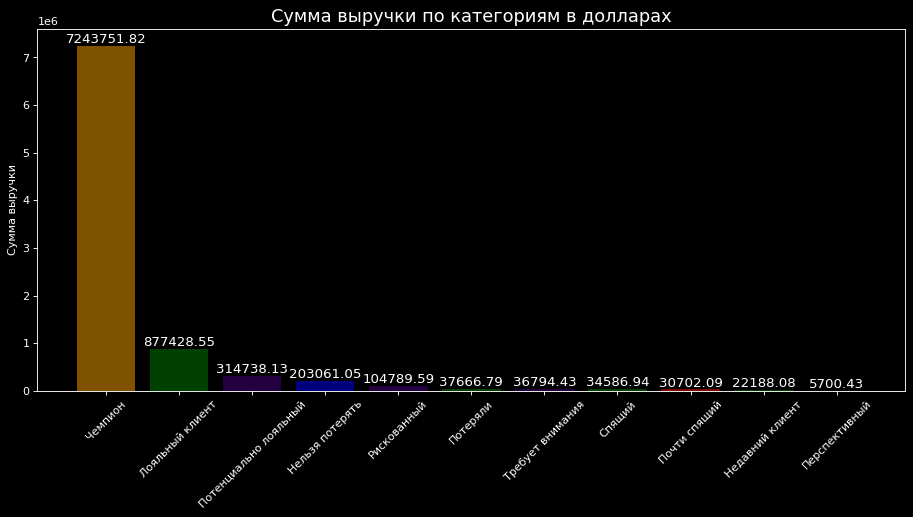

In [ ]:
# Prepare Data
t = rfm.groupby('sorted')['monetary'].sum().reset_index(name='value').sort_values('value',ascending=False)
n = t['sorted'].unique().__len__()+1
all_colors = list(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(14,6), dpi= 80)
plt.bar(t['sorted'], t['value'], color=c, width=0.8, alpha=0.5)
for i, val in enumerate(t['value'].values):
    plt.text(i, val, round(float(val),2), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(t['sorted'], rotation=45, horizontalalignment= 'center')
plt.title("Сумма выручки по категориям в долларах", fontsize=16)
plt.ylabel('Сумма выручки')
#plt.ylim(0, 1700)
plt.show()

In [ ]:
rfm_monetary = rfm.groupby('sorted')['monetary'].agg(['count','sum'])
rfm_monetary.reset_index().sort_values(by='sum', ascending=False)

,sorted,count,sum
10,Чемпион,1551,7243751.820
0,Лояльный клиент,866,877428.552
4,Потенциально лояльный,842,314738.132
2,Нельзя потерять,50,203061.050
7,Рискованный,215,104789.590
5,Потеряли,231,37666.790
9,Требует внимания,80,36794.430
8,Спящий,130,34586.940
6,Почти спящий,153,30702.090
1,Недавний клиент,175,22188.080


# Выводы и рекомендации:

✅ 1. **Кто мои лучшие клиенты?** 

- лучшие клиенты это категория "Чемпионы" (купили недавно, покупают часто и тратят больше всех), у нас 1551 клиентов которые принесли нам 7 243 751 долларов за 2010-2011 год.

*Рекомендация:*

> Наградите их. Могут быть первопроходцами новых продуктов. Будут продвигать ваш бренд.


---


✅ 2. **Какие клиенты находятся на грани оттока?** 
- это клиенты категории "Рискованный" (тратили большие деньги и покупали часто. Но давно. Нужно вернуть их.), таких у нас 124 клиента. В сумме они принесли нам 81 600 долларов.

*Рекомендация:*

> Отправляйте персонализированные электронные письма, чтобы восстановить связь, предложить уникальные условия.


---


✅ 3. **Кто такие потерянные клиенты, на которых не нужно обращать особого внимания?**

Потеряли - 231 клиент, принесли нам 37 000. 

*Рекомендация*

Возродите интерес с помощью рекламной кампании, иначе игнорируйте.

---


✅ 4. **Каких клиентов вы должны сохранить?**
- в первую очередь стоить обратить внимание на категорию "Нельзя потерять". Таких у нас 50 клиентов, выручка по ним 203 000 долларов.

*Рекомендация:*

>  Верните их с помощью обновлений или новых продуктов, не теряйте их из-за конкуренции, общайтесь с ними.


---


✅ 5. **Кто ваши постоянные клиенты?**
- категория "Лояльные клиенты" (тратят хорошие деньги с нами часто. Реагирует на рекламные акции.) 866 клиентов, общая выручка 877 000 долларов.

*Рекомендация:*

> Допродажи продуктов с более высокой стоимостью. Спросите отзывы. Задействуйте их.


---


✅ 6. **У кого есть потенциал превратиться в более прибыльных клиентов?**
- категория "Потенциально лояльный" (недавние клиенты, но потратили хорошую сумму и купили не один раз.), 847 клиентов, общая выручка 314 000 долларов.

*Рекомендация:*

> Предложите членство/программу лояльности, порекомендуйте другие продукты.


---


✅ 7. **Какая группа клиентов, скорее всего, отреагирует на вашу текущую рекламную кампанию?**

- ❓ этот вопрос скорее бизнесу, тут нужно узнать, что за рекламная компания проходит или какая рекламная компания будет проходить. В целом много нюансов которые нужно уточнить. 

# В заключении, тезисно:

> Любую таблицу которую я тут сделал, можно выгрузить в формате excel и отдать бизнесу. Либо не выгружать, а отдать в текущем формате. Никаких программ устанавливать не нужно.

Весь анализ, полностью основан на данных которые предоставляет бизнес. Поэтому все рекомендации, какие то особенности, аномалии и тд. - это максимально актуально.

> Можно визуализировать данные для твоих презентаций, чтобы качественно их интегрировать. Либо сделать из этого отдельный кейс по анализу бизнеса.

Для анализа RFM обызательны: 1.идентификатор клиента, 2.дата покупок, 3.факт покупки, 4.сумма одной покупки. Чем больше данных тем точнее и качетсвенне будут выводы. Если клиентов мало, такого рода анализ не имеет смысла. 

> Все что я делаю, могу защитить и объяснить по видео. 

Все что я предлагаю - бесплатно. Моя выгода это возможность практики. 




Большое тебе спасибо, за то что посмотрела этот проект! 😊

In [ ]:
rfm_customer = rfm[['CustomerID', 'sorted']]

In [ ]:
df = df.merge(rfm_customer, how='left', on='CustomerID')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,revenue,sorted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,Нельзя потерять
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Нельзя потерять
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,Нельзя потерять
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Нельзя потерять
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Нельзя потерять
...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,10.20,Лояльный клиент
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,12.60,Лояльный клиент
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,16.60,Лояльный клиент
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,16.60,Лояльный клиент


In [ ]:
# экспорт полученных данных в таблицу ексель
rfm.to_excel('rfm_data.xlsx')